## Drawing

This notebook is for making / demoing my drawing-based images. This currently includes:

- Chinese character based art
- Shape based art

How can I actually generate art? Steps are as follows:

- Generate PNG from code below (TODO - try SVG?)
- Visit [url](https://cam.openbuilds.com), pick the Acro A1 DrawBot with scribe extension
- Upload the PNG (drag and drop works)
- Select document (single checkbox) and select the following options:
    - "Pen Plotter: (no offset)" as type of cut
    - Endmill / Pen Diameter: 1mm (TODO - different width?)
- Click "Generate G-Code", and then you can click the eye icon to preview the G-Code (and copy it)

Still haven't figured out sizes - how can we resize without changing quality? Maybe only by making it an SVG? Or just get the GCode and scale it down via hacky regex Python?

Final update - I think I should just create GCode for this directly. How? Answer: greedily. Loop around a circle, and then without even raising the pen just move back around the circle to find the closest once that's next (greedily).

In [ ]:
from IPython import get_ipython

ipython = get_ipython()
ipython.run_line_magic("load_ext", "autoreload")
ipython.run_line_magic("autoreload", "2")

import copy
import gc
import json
import pickle
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pyperclip
from IPython.display import HTML, SVG, Image, clear_output, display
from PIL import Image as PIL_Image
from PIL import ImageDraw

import drawing

## Drawing (actual pieces)

What have I learned so far?

- Going down to min size of about 0.05 will give you closer accuracy to the exact image (cause you can draw tiny things)
    - So you want it small but not too small (e.g. 0.08)
- Increasing `n_random` does help: up to about 500 is very beneficial (I guess because of the larger parameter space)
- `1050` shapes, and size range of `(0.08, 0.5)` seemed like a good starting point (but I think doing more would be okay, it wasn't too dark anywhere) and finished in under half an hour








### Flowers

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/flower_1b.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=900,
    n_random=300,
    darkness=0.14,
    negative_penalty=0.0,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/flower_01.png")
np.savez("outputs_drawing/flower_01.npz", **all_coords)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_1c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[250, 850],
    n_random=300,
    darkness=[0.23, 0.16],
    negative_penalty=0.0,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/rose_01.png")
np.savez("outputs_drawing/rose_01.npz", **all_coords)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_3d.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1400,
    n_random=300,
    darkness=0.20,
    negative_penalty=0.0,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/rose_03.png")
np.savez("outputs_drawing/rose_03.npz", **all_coords)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_4c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[320, 1000],
    n_random=750,
    darkness=[0.4, 0.19],
    negative_penalty=0.0,
    zoom_fractions=(0.2, 0.2),
    outer_bound=0 / 30,  # 1 / 30
    inner_bound=2 / 30,  # 1 / 30
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

name = "rose_04"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)


In [ ]:
all_coords_loaded = dict(np.load("outputs_drawing/rose_04.npz"))
border_lengths, target_y, target_x = json.load(open("outputs_drawing/rose_04.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)


In [ ]:
tiling = (2, 1)
margin = 10

ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)

# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))


In [ ]:
tiling = (2, 1)
margin = 10

ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
)

# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))


In [ ]:
tiling = (2, 2)
margin = 4

ymax = 320
xmax = int(330 * 2**0.5)
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=True,
    plot_gcode=True,
)

# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

# {'red': (77, 173), 'black': (108, 86)}

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_4c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=800,
        blur_rad=2,
    ),
    n_shapes=[100, 360],
    n_random=400,
    darkness=[1.0, 0.45],
    negative_penalty=0.0,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/rose_04_small.png")
np.savez("outputs_drawing/rose_04_small.npz", **all_coords)

### Cow

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/cow-1e.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=600,
    n_random=500,
    darkness=0.12,
    negative_penalty=0.1,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.04, 0.8),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords = mydraw.create_img(seed=3)

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/cow_01.png")
np.savez("outputs_drawing/cow_01.npz", **all_coords)

In [ ]:
all_coords_loaded = dict(np.load("outputs_drawing/cow_01.npz"))

center_list = [(0, 0)]
radius_list = [(80, 80)]
gcode_all = []

for center, radius in zip(center_list, radius_list):
    gcode = drawing.make_gcode(
        all_coords_loaded,
        center=center,
        radius=radius,
        speed=10_000,
    )
    gcode_all.append(gcode)

BLACK = gcode_all[0]["black"]  # + gcode_all[1][(0, 0, 0)]
print(f"\nn_lines = {len(BLACK)}")
print(f"Total number of raise/lower commands = {len([x for x in BLACK if 'G1' not in x])}")

pyperclip.copy("\n".join(BLACK[:]))
# pyperclip.copy("\n".join(["M3S0 ; lower"] + RED[100:]))

# TODO - add estimated time (I can check how long this one took)

### London

FS dithering complete in 0.80s
red, density = 0.3261
black, density = 0.6739


Drawing black: 100%|██████████| 1200/1200 [02:20<00:00,  8.52it/s]


  Bounding box (rescaled, inner):  [0.105475-0.779377, 0.096924-0.998341], AR = 1.337609


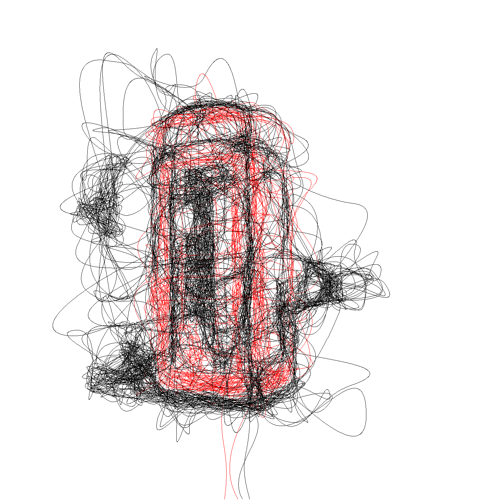

In [61]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_box_sketch_2c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[400, 1200],
    n_random=300,
    darkness=[0.35, 0.16],
    negative_penalty=0.0,
    zoom_fractions=None,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

name = "london_box_sketch_02"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)


In [ ]:
name = "london_box_sketch_02"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_box_sketch_1b.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[550, 1600],
    n_random=400,
    darkness=[0.27, 0.18],
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

name = "london_box_sketch_01"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)

In [ ]:
name = "london_box_sketch_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_bus_sketch_2e.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[550, 1600],
    n_random=500,
    darkness=[0.27, 0.18],
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

name = "london_bus_sketch_01"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)

In [ ]:
name = "london_bus_sketch_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [95]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_eye_3a1.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=900,
    n_random=600,
    darkness=0.24,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.09, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

name = "london_eye_01"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)

Drawing black:   4%|▍         | 35/900 [00:12<04:57,  2.91it/s]


KeyboardInterrupt: 

  Bounding box (rescaled, inner):  [0.000217-0.919531, 0.000000-0.997543], AR = 1.085095


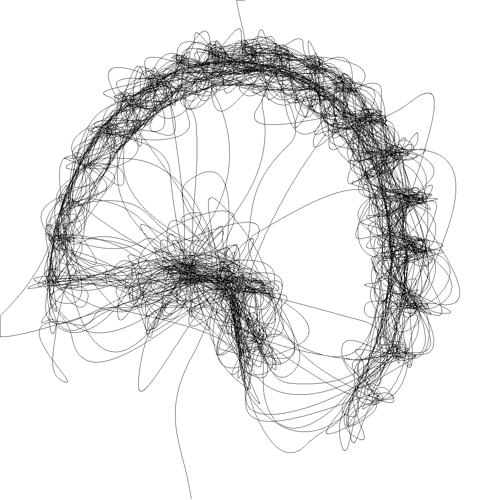

0, 0


AssertionError: Coords [ 0.38235768 -0.05754296] are out of bounds 0-0.94, 0-0.94

In [94]:
name = "london_eye_01"

# all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
# border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()
all_coords_loaded = all_coords.copy()

bounding_x = (0.06, 1.0)
bounding_y = (0.0, 0.94)

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=bounding_x, bounding_y=bounding_y, target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (1, 1)
margin = 10
ymax = 220
xmax = 220
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=False,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))

Drawing black: 100%|██████████| 1600/1600 [03:59<00:00,  6.69it/s]


  Bounding box (rescaled, inner):  [0.121437-0.837629, 0.000000-0.998698], AR = 1.394457


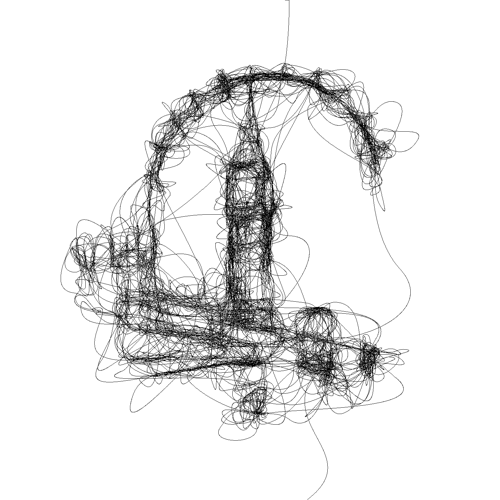

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london-landmarks-1f.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=1024,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1300,
    n_random=300,
    darkness=0.24,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=(0.1, 0.1),
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.05, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

name = "london_landmarks_01"

# canvas.save(f"outputs_drawing/{name}.png")
# np.savez(f"outputs_drawing/{name}.npz", **all_coords)
# json.dump(
#     {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
#     open(f"outputs_drawing/{name}.json", "w"),
# )

In [ ]:
name = "london_landmarks_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
# ?
# TODO - see if increasing size range from 0.05 to 0.09 is actually bad

mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/big-ben-2e.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1500,
    n_random=600,
    darkness=0.25,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=(0.1, 0.1),
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.09, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

name = "london_big_ben_01"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)

Drawing black: 100%|██████████| 1500/1500 [06:30<00:00,  3.85it/s]


  Bounding box (rescaled, inner):  [0.162475-0.822906, 0.000000-0.881339], AR = 1.334489


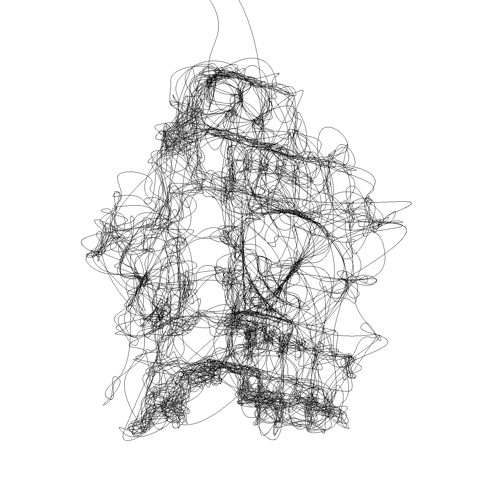

In [97]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/big-ben-2e.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1500,
    n_random=600,
    darkness=0.25,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=(0.1, 0.1),
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.05, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, all_coords, border_lengths, target_y, target_x = mydraw.create_img(use_borders=True)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

name = "london_big_ben_01"

canvas.save(f"outputs_drawing/{name}.png")
np.savez(f"outputs_drawing/{name}.npz", **all_coords)
json.dump(
    {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
    open(f"outputs_drawing/{name}.json", "w"),
)

  Bounding box (rescaled, inner):  [0.037605-0.698037, 0.000000-0.881339], AR = 1.334489


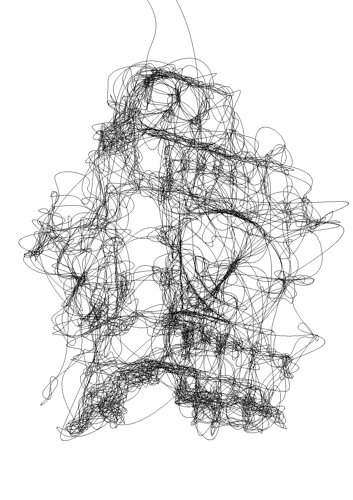

0, 0
  Bounding box (orig, outer):  [0.000-0.707, 0.000-1.000], AR = 1.414
  Bounding box (orig, inner):  [0.038-0.698, 0.119-1.000], AR = 1.334
  Bounding box (outer): [000.00-180.00, 000.00-250.00], AR = 1.389
  Bounding box (inner): [009.40-174.51, 029.67-250.00], AR = 1.334
1, 0
  Bounding box (orig, outer):  [0.000-0.707, 0.000-1.000], AR = 1.414
  Bounding box (orig, inner):  [0.038-0.698, 0.119-1.000], AR = 1.334
  Bounding box (outer): [190.00-370.00, 000.00-250.00], AR = 1.389
  Bounding box (inner): [199.40-364.51, 029.67-250.00], AR = 1.334

bounding_box  ... time = sum(00.61, 00.89) = 1.50 minutes
black         ... time = sum(27.11, 27.38) = 54.49 minutes


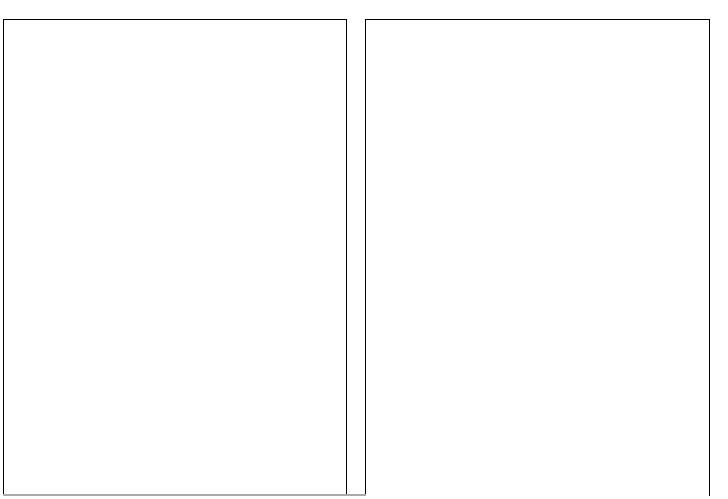

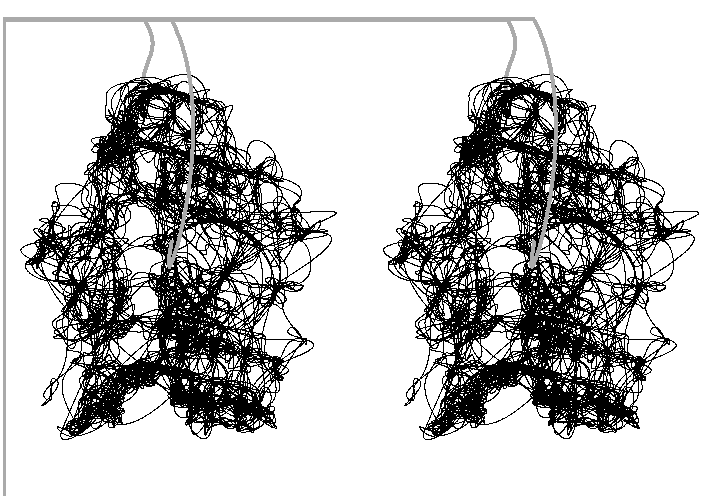

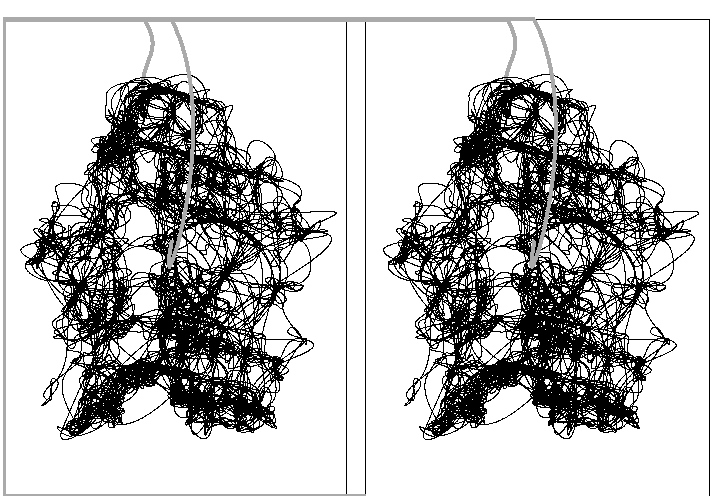

In [104]:
name = "london_big_ben_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded, bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len), target_y=target_y, target_x=target_x
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 240 # 257 max
xmax = 360 # 377 max
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))

## Chinese characters

In [ ]:
params = DrawingParams(n_shapes=2000, char_size=40)

canvas = params.create_img()

# Okay finally got it looking good! Just had to keep decreasing the darkness
PIL_Image.fromarray(canvas).resize((500, 500))

In [ ]:
params = DrawingParams(
    mode="shapes",
    n_shapes=3200,
    x=500,
    output_x=1200,
    darkness=0.45,
    shape_sizes=(10, 80),
)

canvas = params.create_img()

PIL_Image.fromarray(canvas).resize((500, 500))

In [ ]:
params = DrawingParams(
    mode="shapes",
    shape_type="tri",
    n_shapes=3600,
    x=500,
    output_x=1200,
    darkness=0.5,
    shape_sizes=(15, 100),
)

canvas = params.create_img()

PIL_Image.fromarray(canvas).resize((500, 500))

In [ ]:
params = DrawingParams(
    mode="shapes",
    shape_type="hex",
    n_shapes=4000,
    x=500,
    output_x=1200,
    darkness=0.4,
    shape_sizes=(10, 100),
)

canvas = params.create_img()

PIL_Image.fromarray(canvas).resize((500, 500))

In [ ]:
params = DrawingParams(
    mode="shapes",
    shape_type="rect",
    n_shapes=3000,
    x=500,
    output_x=1200,
    darkness=0.35,
    shape_sizes=(10, 100),
)

canvas = params.create_img()

PIL_Image.fromarray(canvas).resize((500, 500))